In [2]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [6]:
#  3. Convert the June temperatures to a list.
june = []
june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(june)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june, columns = ['date','June Temperature'])
june_df.set_index(june_df['date'], inplace=True)
june_df = june_df.sort_index()
print(june_df.to_string(index=False))

      date  June Temperature
2010-06-01              78.0
2010-06-01              73.0
2010-06-01              77.0
2010-06-01              69.0
2010-06-01              76.0
2010-06-01              71.0
2010-06-01              74.0
2010-06-01              70.0
2010-06-01              74.0
2010-06-02              78.0
2010-06-02              70.0
2010-06-02              76.0
2010-06-02              76.0
2010-06-02              71.0
2010-06-02              76.0
2010-06-02              76.0
2010-06-02              72.0
2010-06-02              76.0
2010-06-03              74.0
2010-06-03              78.0
2010-06-03              73.0
2010-06-03              72.0
2010-06-03              77.0
2010-06-03              76.0
2010-06-03              75.0
2010-06-03              78.0
2010-06-03              67.0
2010-06-04              73.0
2010-06-04              75.0
2010-06-04              75.0
2010-06-04              76.0
2010-06-04              73.0
2010-06-04              68.0
2010-06-04    

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [10]:
# 7. Convert the December temperatures to a list.
december = []
december = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(december, columns = ['date','December Temperature'])
dec_df.set_index(dec_df['date'], inplace=True)
dec_df = dec_df.sort_index()
print(dec_df.to_string(index=False))

      date  December Temperature
2010-12-01                  76.0
2010-12-01                  73.0
2010-12-01                  72.0
2010-12-01                  78.0
2010-12-01                  72.0
2010-12-01                  70.0
2010-12-01                  71.0
2010-12-01                  73.0
2010-12-02                  71.0
2010-12-02                  71.0
2010-12-02                  73.0
2010-12-02                  75.0
2010-12-02                  74.0
2010-12-02                  72.0
2010-12-02                  74.0
2010-12-02                  70.0
2010-12-03                  67.0
2010-12-03                  74.0
2010-12-03                  70.0
2010-12-03                  74.0
2010-12-03                  71.0
2010-12-03                  74.0
2010-12-03                  72.0
2010-12-03                  73.0
2010-12-04                  75.0
2010-12-04                  72.0
2010-12-04                  77.0
2010-12-04                  74.0
2010-12-04                  74.0
2010-12-04

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# D3:Statistical analysis 

([<matplotlib.axis.XTick at 0x7f7986fff520>,
 [Text(1, 0, 'June'), Text(2, 0, 'December')])

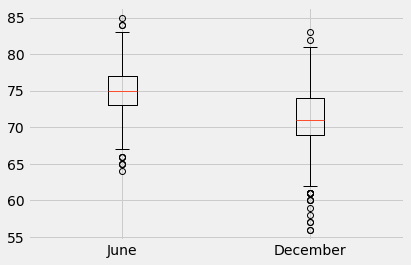

In [14]:
# Plot the Data
plt.boxplot([june_df['June Temperature'], dec_df['December Temperature']])
plt.xticks([1, 2], ['June', 'December'])

In [15]:
# Additional queries 
# Precipitation
prcp_jun = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
prcp_dec = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

In [16]:
prcp_jun_df = pd.DataFrame(prcp_jun, columns=['date', 'June Precipitation'])
prcp_jun_df.set_index(prcp_jun_df['date'], inplace=True)
prcp_jun_df = prcp_jun_df.sort_index()

prcp_dec_df = pd.DataFrame(prcp_dec, columns=['date', 'December Precipitation'])
prcp_dec_df.set_index(prcp_dec_df['date'], inplace=True)
prcp_dec_df = prcp_dec_df.sort_index()

In [17]:
prcp_jun_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [18]:
prcp_dec_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:>

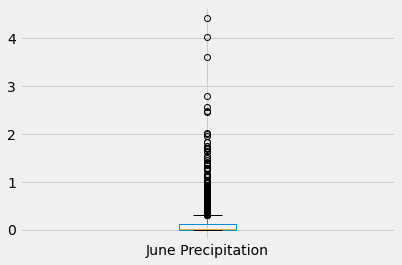

In [19]:
prcp_jun_df.boxplot()

<AxesSubplot:>

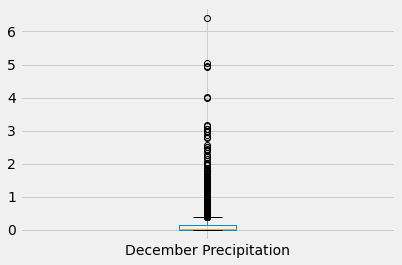

In [20]:
prcp_dec_df.boxplot()

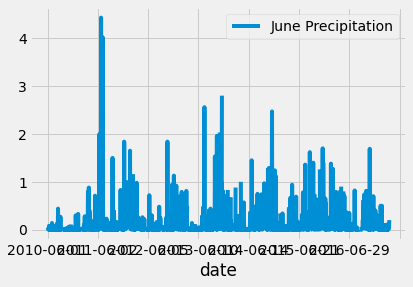

In [66]:
ax1 = prcp_jun_df.plot()

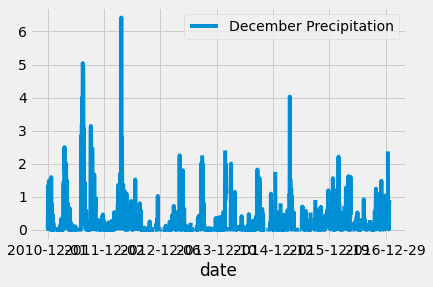

In [67]:
ax2 = prcp_dec_df.plot()

In [ ]:
git